In [1]:
import pandas as pd
import numpy as np

In [2]:
#1.1
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
#1.2
y = train['price']
x = train.drop(['price'],axis=1)

In [4]:
#1.3
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#1,4
데이터가 무작위로 분할되기 때문에 시간에 있는 데이터에서 시간이 편향되어 분할되는 문제가 발생할 수 있다.

In [5]:
#1.5
idx = train[train['transaction_year'] == 4].index
val_x = x.iloc[idx]
val_y = y.iloc[idx]
train_x = x.iloc[-idx]
train_y = y.iloc[-idx]

In [6]:
#1.6
from category_encoders.cat_boost import CatBoostEncoder
ce = CatBoostEncoder()
train_x = ce.fit_transform(train_x, train_y)
validation_x = ce.fit_transform(val_x, val_y)

In [7]:
validation_x.head()

,dong,apt,exclusive_use_area,floor,transaction_year,until_trans,sin_date,cos_date
2451,53693.710223,53693.710223,107.91,14,4,9,-1.000000e+00,-1.836970e-16
2452,68346.855111,68346.855111,151.81,10,4,9,-1.000000e+00,-1.836970e-16
2453,85231.236741,85231.236741,94.51,2,4,9,-2.449294e-16,1.000000e+00
2454,85048.427556,85048.427556,94.28,12,4,9,-2.449294e-16,1.000000e+00
2455,53693.710223,53693.710223,145.96,13,4,13,-1.000000e+00,-1.836970e-16


In [8]:
#2.1
import matplotlib.pyplot as plt
import seaborn as sns

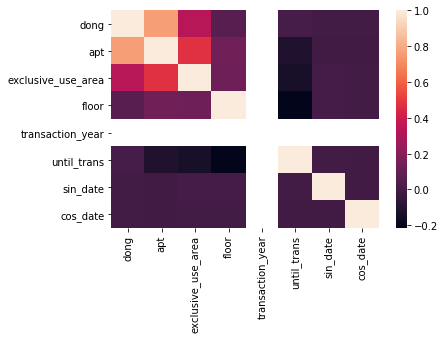

In [9]:
sns.heatmap(validation_x.corr())

In [10]:
#2.2
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from math import sqrt

In [11]:
alpha=[0.00001, 0.0001, 0.001, 0.01, 0.1]
rmse = []
for i in range(5):
    r = Ridge(alpha[i])
    r.fit(train_x, train_y)
    pred = r.predict(validation_x)
    rmse.append(sqrt(mean_squared_error(val_y, pred)))
    

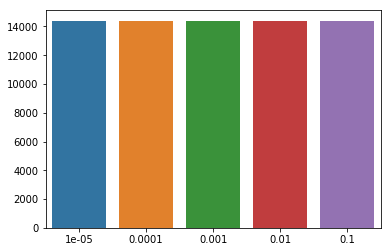

In [12]:
#2.3
sns.barplot(x=alpha, y=rmse)

#2.4 

모든 alpha 값에서 비슷한 mse값을 가지므로 튜닝이 잘 되지 않았다.


In [13]:
#2.5
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_x, train_y)
pred = r.predict(validation_x)
m = sqrt(mean_squared_error(val_y, pred))

In [14]:
print(m, rmse)

14398.384528003442 [14398.384420198045, 14398.384420295077, 14398.384421265422, 14398.384430968883, 14398.384528003442]


두 모형의 mse가 거의 같기 때문에 둘 중 어느 것을 쓰더라도 무방하다고 생각한다.


# 3.1
기존의 부스팅 모델은 level-wise하게 트리가 늘어났지만 lightgbm은 leaf wise하게 트리가 늘어난다.

기존의 부스팅 모델은 트리의 균형을 맞춰야 했고 이 시간이 필요했지만 lightgbm은 균형을 맞추지 않는다

장점 - 학습 시간이 적고 메모리 사용량이 적다.

단점 - 데이터 수가 적을 경우 과적합 가능성이 크다.

In [15]:
#3.2
import lightgbm as lgb
from lightgbm import LGBMRegressor

learning_rate=[0.01,0.05,0.1,0.3,0.5,0.7,0.99]
rmse = []
for i in learning_rate:
    lgbm = LGBMRegressor(learning_rate=i)
    lgbm.fit(train_x, train_y)
    pred = lgbm.predict(validation_x)
    mse = mean_squared_error(val_y, pred)
    rmse.append(sqrt(mse))

In [16]:
rmse

[19624.585629587673,
 11348.945663995275,
 11336.742095656713,
 11588.545637173223,
 12145.509563600195,
 12513.23175211141,
 13736.35479883936]

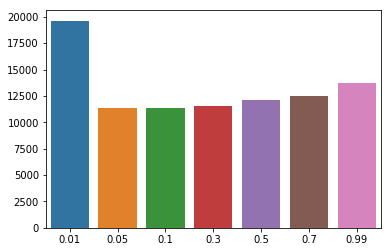

In [17]:
sns.barplot(x=learning_rate, y=rmse)

#3.4
grid search - 모든 파라미터의 값들을 입력하여 가장 높은 성능을 보이는 하이퍼 파라미터를 찾는 방법

장점 - 모든 경우의 수를 고려하여 최적의 파라미터를 찾을 수 있다.

단점 - 모든 경우의 수를 고려하기 때문에 파라미터를 찾는데 많은 비용이 들어간다.

random search - 범위를 지정해주고 임의의 수를 파라미터로 하여 최적의 파라미터를 찾는 방식

장점 - grid search에 비해 탐색 시간이 짧다

단점 - 모든 경우를 고려하지 않기 때문에 찾은 파라미터가 최적의 파라미터가 아닐 수 있다


bayesian optimization - 입력값을 받는 목적 함수를 하나 만들고 그 함수의 값을 최대로 만드는 최적해를 찾는 방법,

장점 - 시간 대비 성능이 좋다
단점 - 모르겠습니다.. 제가 이해하기 어려운게 단점...


In [21]:
#4.1
testy = test['price']
testx = test.drop(['price'], axis=1)

In [28]:
#4.2
c=CatBoostEncoder()
train_x = c.fit_transform(x, y)
test_x = c.fit_transform(testx, testy)

In [30]:
#4.3
r = Ridge(0.001)
r.fit(train_x, y)
pred = r.predict(test_x)
mse = mean_squared_error(testy, pred)
ridge_rmse = (sqrt(mse))
ridge_rmse

15482.838426744162

In [31]:
lgbm = LGBMRegressor(learning_rate=0.05)
lgbm.fit(train_x, y)
pred = lgbm.predict(test_x)
mse = mean_squared_error(testy, pred)
lgbm_rmse = (sqrt(mse))
lgbm_rmse

13754.885724638347

#4.4

test set에서 rmse가 Ridge 모델에서는 15482, lgbm 모델에서는 13754로 lgbm 모델에서 더 낮은 모습을 보인다.

lgbm이 더 학습이 잘 되었다고 말할 수 있다.